In [33]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.manifold import TSNE

# plotting
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors

import seaborn as sns
import os
import json
from translator import translator
import pickle

In [19]:
from wiktra.Wiktra import Transliterator
tr = Transliterator()
def transli(word):
    return tr.tr(word, lang='grc', sc='Grek', to_sc='Latn', explicit=True)

In [10]:
vectors_dict = {}
for filename in [f for f in os.listdir("../data/") if "keyed_vectors" in f]:
    vectors_dict[filename.partition(".")[0]] = KeyedVectors.load("../data/" + filename)

In [11]:
#terms suggested by ChatGPT
aristotle_terms = ['τέλος', 'φρόνησις', 'οὐσία', 'ὑλομορφισμός', 'ἐντελέχεια', 'ἀναγνώρισις', 'κάθαρσις', 'εὐδαιμονία', 'ἀρετή', 'λόγος', 'διάνοια', 'ποίησις', 'πρᾶξις', 'ἐνέργεια', 'δύναμις', 'κίνησις', 'ἕξις', 'ἐπιστήμη', 'τέχνη', 'φύσις']

In [12]:
vectors_dict.keys()

dict_keys(['keyed_vectors_full', 'keyed_vectors_excl_arist', 'keyed_vectors_excl_aristplato', 'keyed_vectors_arist', 'keyed_vectors_excl_subcorpora', 'keyed_vectors_subcorpora', 'keyed_vectors_excl_hipp', 'keyed_vectors_excl_plato'])

In [22]:
word = aristotle_terms[2]
nns_transli = transli(word) + " NNs: " + ", ".join([transli(tup[0]) for tup in vectors_dict["keyed_vectors_arist"].most_similar(word, topn=10)])

In [70]:
aristotle_terms_nns = []
for word in aristotle_terms:
    try:
        nns_transli = {"keyword" : transli(word),  "NNs" : ", ".join([transli(tup[0]) for tup in vectors_dict["keyed_vectors_arist"].most_similar(word, topn=5)])}
        aristotle_terms_nns.append(nns_transli)
    except:
        pass
pd.DataFrame(aristotle_terms_nns)

,keyword,NNs
0,télos,"áriston, praktós, péras, eudaimonía, haire..."
1,phrónēsis,"sophía, praktikós, theōrētikós, súnesis,..."
2,ousía,"khōristós, katēgoría, tosósde, idéa, mat..."
3,entelékheia,"khōristós, enérgeia, adunamía, oîos, eîmi"
4,kátharsis,"katamḗnios, ekdúō, metópōron, gunaikeîo..."
5,eudaimonía,"anthrṓpinos, áriston, beltíōn, autárkēs..."
6,aretḗ,"andreía, sōphrosúnē, eugéneia, epainetós..."
7,lógos,"prâgma, diaphōnéō, álogos, diánoia, epis..."
8,diánoia,"logismós, proaíresis, sunteínō, órexis, s..."
9,poíēsis,"máthēsis, theōrētikós, gnôsis, mímēsis..."


In [73]:
excl_aristotle_terms_nns = []
for word in aristotle_terms:
    try:
        nns_transli = {"keyword" : transli(word),  "NNs" : ", ".join([transli(tup[0]) for tup in vectors_dict["keyed_vectors_excl_arist"].most_similar(word, topn=5)])}
        excl_aristotle_terms_nns.append(nns_transli)
    except:
        pass
pd.DataFrame(excl_aristotle_terms_nns)

,keyword,NNs
0,télos,"teleutaîos, péras, hupopteúō, eúthuna, pr..."
1,phrónēsis,"sōphrosúnē, melétē, súnesis, héxis, dik..."
2,ousía,"epitropeúō, leitourgéō, epítropos, méros..."
3,entelékheia,"odoús, sḗpō, rhaphḗ, iētreúō, thnētós"
4,kátharsis,"émpuos, kaûsos, haimatṓdēs, phlegmatṓde..."
5,eudaimonía,"dunasteía, phrónēsis, timḗ, éntimos, are..."
6,aretḗ,"sōphrosúnē, andreía, kállos, eudaimonía,..."
7,lógos,"hupóthesis, apókrisis, apología, légō, ap..."
8,diánoia,"logismós, alḗtheia, philósophos, gnṓmē,..."
9,poíēsis,"súngramma, poíēma, mousikḗ, poiētikós, ..."


In [60]:
word = "ἀρετή"
arete_nns = [tup[0] for tup in vectors_dict["keyed_vectors_arist"].most_similar(word, topn=5)]

In [61]:
def get_tsne_coors(keyed_vectors, keys=None, perplexity=18, seed=1):
    if keys != None:
        vectors = keyed_vectors[keys]
        words = np.array(keys)
    else:
        vectors = keyed_vectors.vectors
        words = np.array(keyed_vectors.index_to_key)
    tsne = TSNE(n_components=2, random_state=seed, perplexity=perplexity, init="pca", learning_rate='auto', metric='cosine', n_iter=1000) # dissimilarity="precomputed",
    pos = tsne.fit_transform(vectors) # project all points into space
    xs, ys = pos[:, 0], pos[:, 1]
    minmax = [pos[:, 0].min(), pos[:, 0].max(), pos[:, 1].min(), pos[:, 1].max()]
    # normalize on scale from 0 to 1
    xs = (xs - minmax[0]) / (minmax[1] - minmax[0])
    ys = (ys - minmax[2]) / (minmax[3] - minmax[2])
    return xs, ys, words

In [62]:
def draw_special_words(wordlist, color, xs, ys, words, ax=None, fontsize=6):
    color_idx = [word[0] for word in enumerate(words) if word[1] in wordlist]
    for x,y,w in zip(xs[color_idx], ys[color_idx] - 0.003, words[color_idx]):
        ax.text(x,y,transli(w), horizontalalignment='center', fontsize=fontsize, color=color, zorder=3)

def plot_embeddings(sub, ax=None):
    keyed_vectors = vectors_dict[sub]
    xs, ys, words = get_tsne_coors(keyed_vectors, keys=None, perplexity=5)
    # all words as dots if not in lists
    dots_idx = [word[0] for word in enumerate(words) if word[1] not in aristotle_terms + arete_nns]
    ax.scatter(xs[dots_idx], ys[dots_idx], s=1, color="lightgrey", zorder=1)
    draw_special_words(aristotle_terms, "green",  xs, ys, words, ax=ax)
    draw_special_words(arete_nns, "red",  xs, ys, words, ax=ax)
    #ax.axes.get_xaxis().set_visible(False)
    #ax.axes.get_yaxis().set_visible(False)
    ax.set_axis_off()
    #fig.savefig("../figures/embeddings_{}.png".format(sub))
    return ax

In [63]:
vectors_dict.keys()

dict_keys(['keyed_vectors_full', 'keyed_vectors_excl_arist', 'keyed_vectors_excl_aristplato', 'keyed_vectors_arist', 'keyed_vectors_excl_subcorpora', 'keyed_vectors_subcorpora', 'keyed_vectors_excl_hipp', 'keyed_vectors_excl_plato'])

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot: >

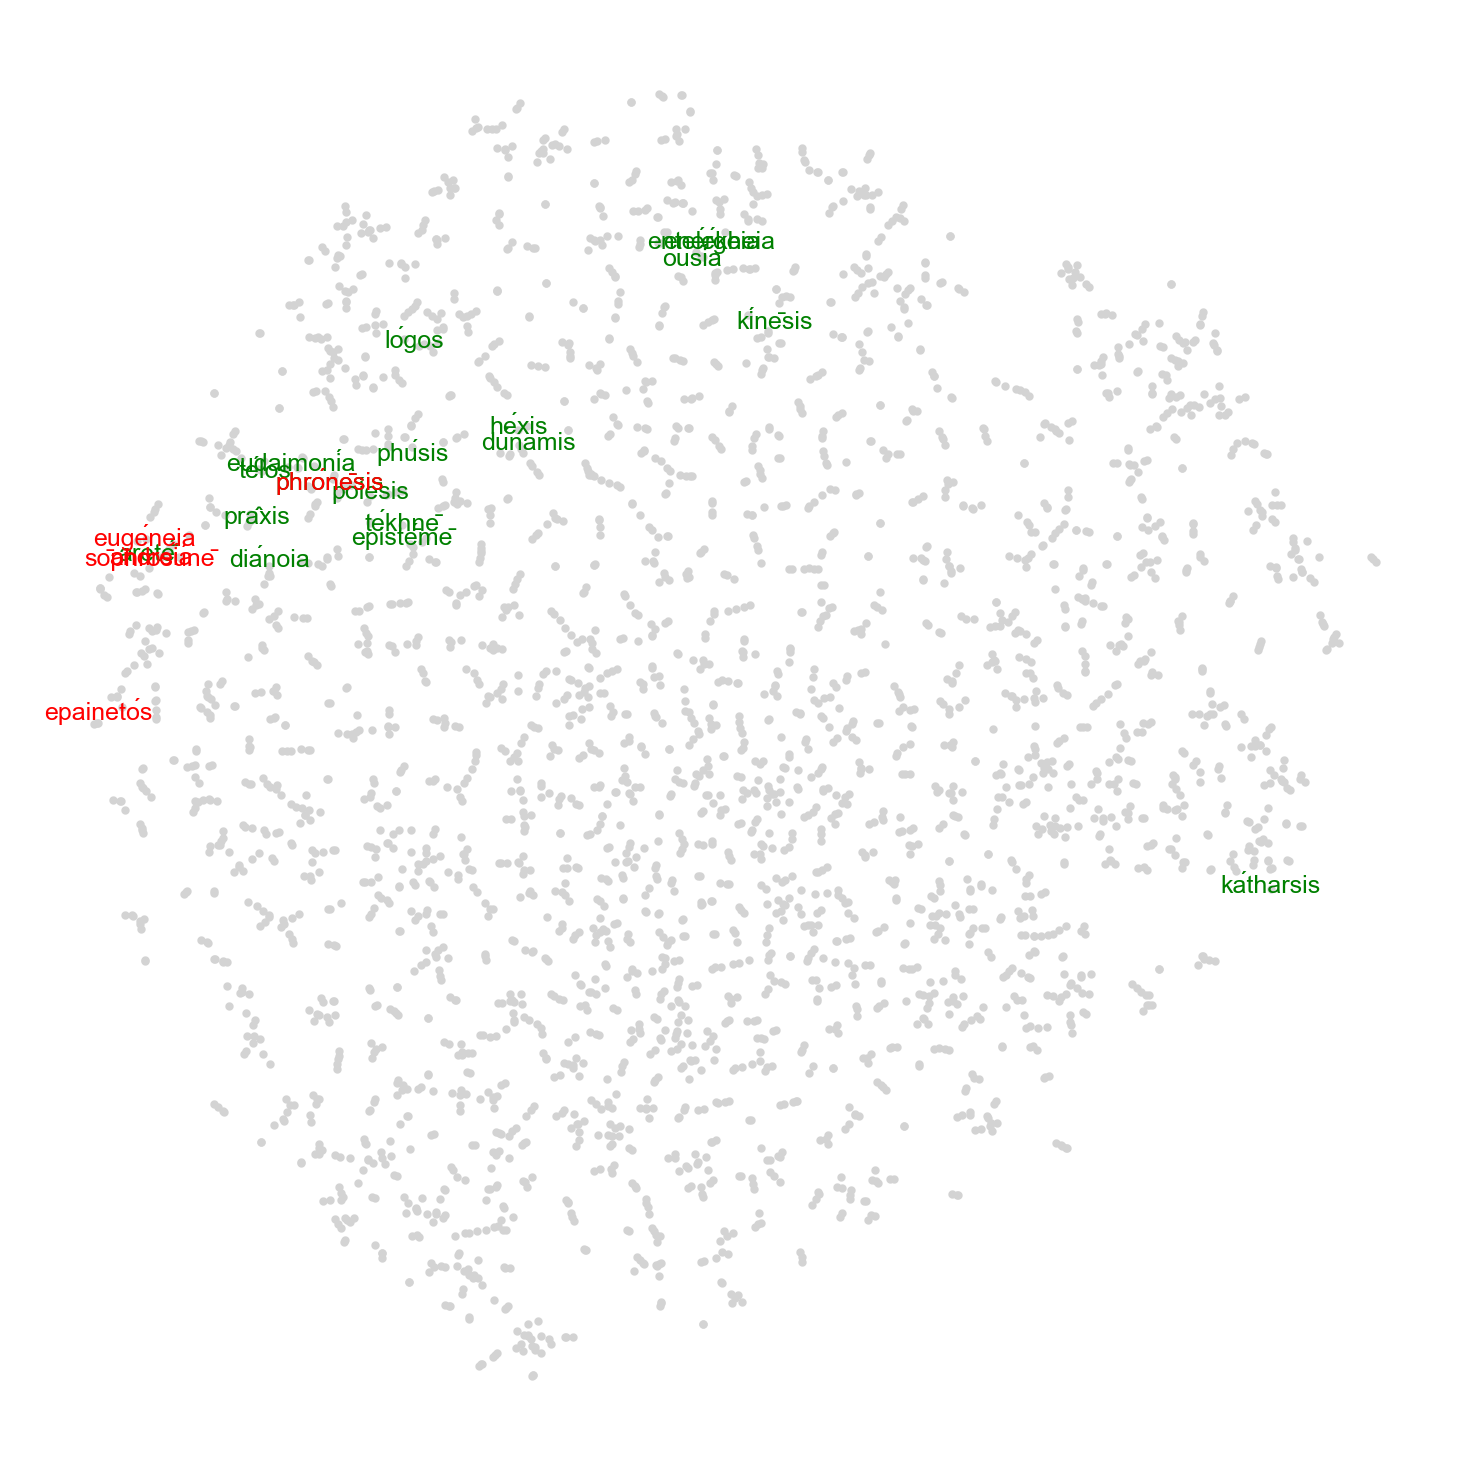

In [64]:
sub = "keyed_vectors_arist"
fig, ax = plt.subplots(figsize=(5, 5), dpi=300, tight_layout=True)
plot_embeddings(sub, ax=ax)

In [65]:
fig.savefig("../figures/embeddings_arist.png")

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot: >

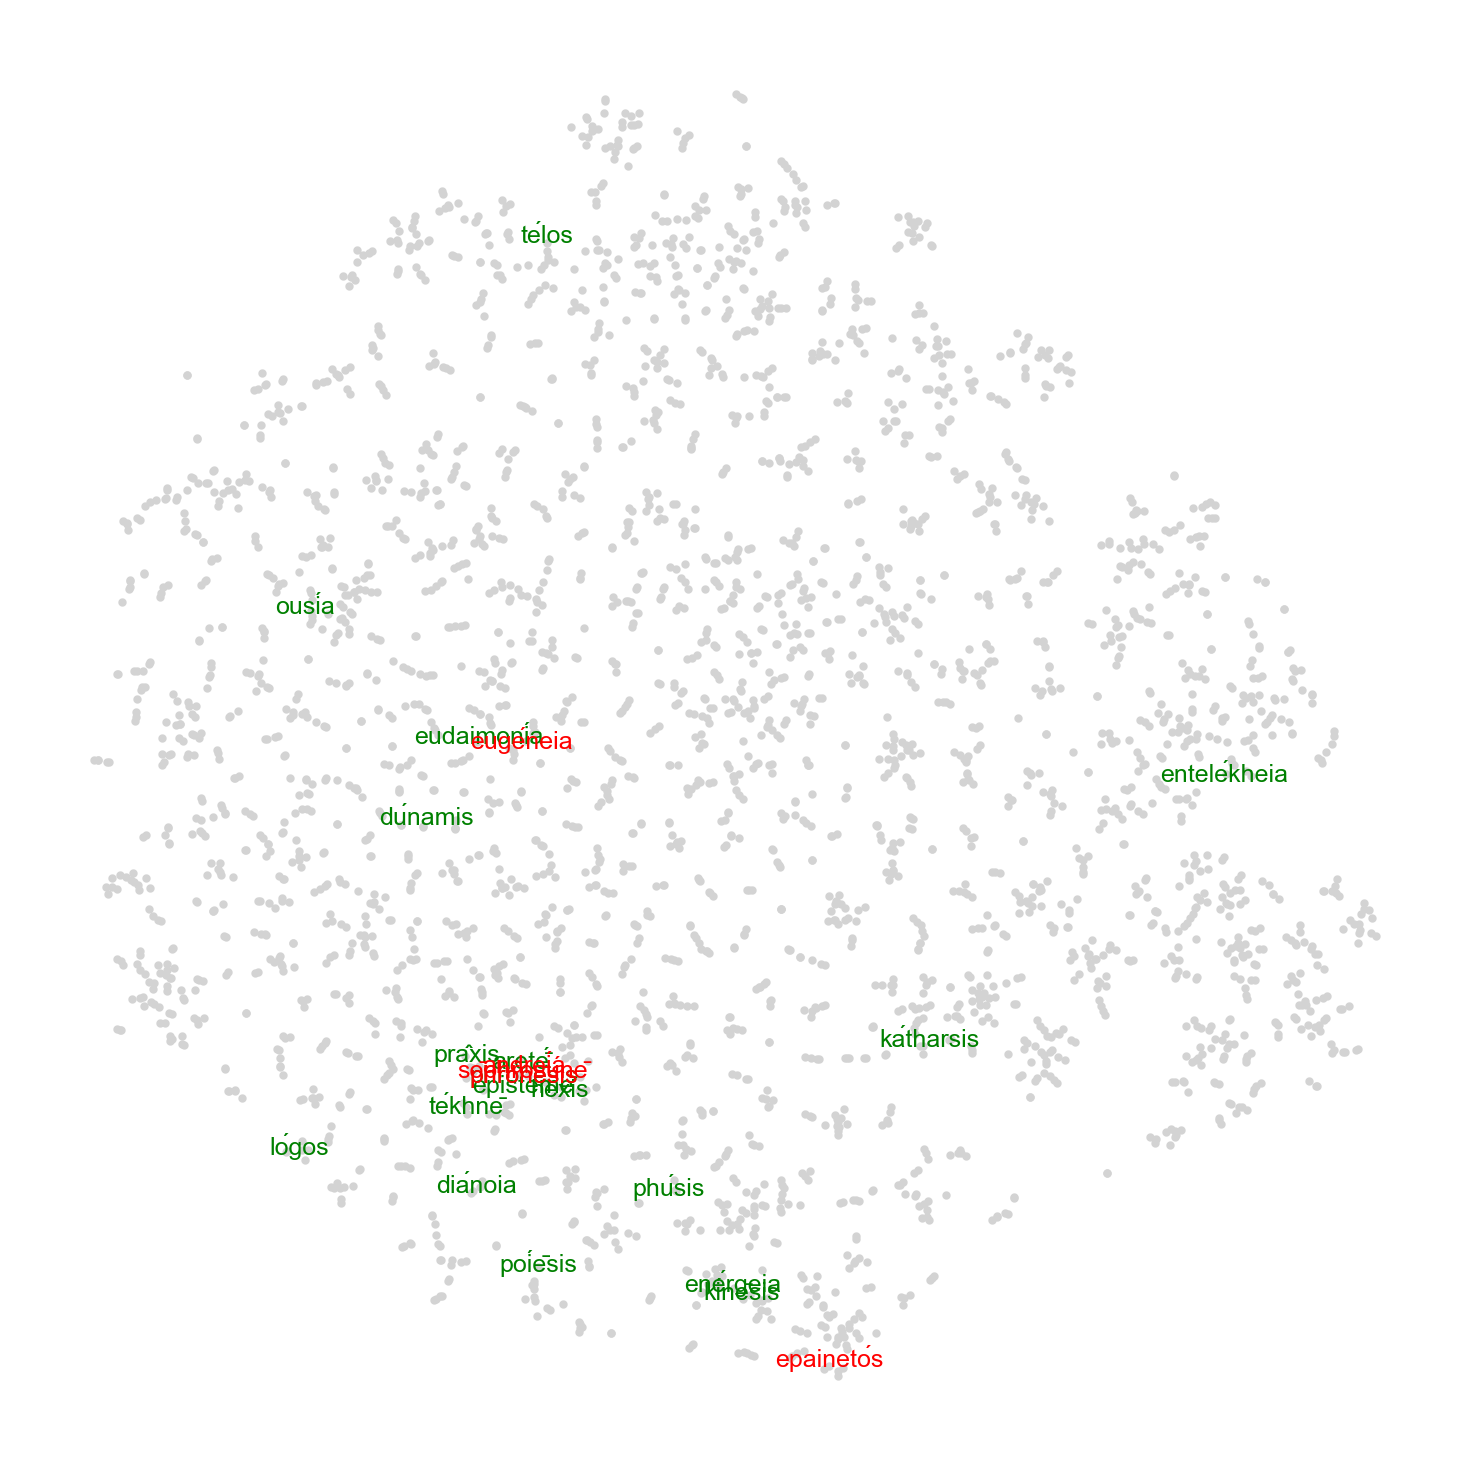

In [68]:
sub = "keyed_vectors_excl_arist"
fig, ax = plt.subplots(figsize=(5, 5), dpi=300, tight_layout=True)
plot_embeddings(sub, ax=ax)

In [69]:
fig.savefig("../figures/embeddings_excl_arist.png")